In [21]:
# Import dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [22]:
# Read csv file 
cdc_df = pd.read_csv('cdc.codes/cdc.csv')
full_data_2017 = pd.read_csv('cdc.codes/2017_code_data.csv')
full_data_2017
adult_data_2017 = pd.read_csv('cdc.codes/samadult.csv')
adult_data_2017

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,...,MBO_PRO1,YTQU_YG1,YTQ_BTY1,YTQ_MDY1,YTQU_TA1,YTQ_BTT1,YTQ_MDT1,YTQU_QG1,YTQ_BTQ1,YTQ_MDQ1
0,1,1,3,1,5829.3,5044,2,12,4,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
1,1,1,9,1,2752.4,3770,1,12,7,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
2,2,1,11,1,14902.0,17305,1,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
3,1,1,15,1,8531.8,7383,2,12,5,1,...,2,1,1.0,1.0,1,1.0,2.0,2,NaN,NaN
4,1,1,18,1,5477.2,8314,1,0,1,1,...,2,1,1.0,1.0,2,NaN,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26737,2,1,58880,4,7030.2,6082,2,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26738,1,1,58881,4,6261.6,5557,2,12,4,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26739,1,1,58882,4,7818.1,7603,2,12,1,2,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26740,1,1,58883,4,8691.9,7833,1,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN


In [23]:
# Reorganize the columns
cdc_df = cdc_df[['Code', 'Description', 'Category']]
cdc_df


,Code,Description,Category
0,URBRRL,Geography (urban vs suburban vs rural),Demographics
1,REGION,"US Geographic Region (SE, NW)",Demographics
2,SEX_A,Sex,Demographics
3,HISP_A,Hispanic ethnicity,Demographics
4,HISPALLP_A,Hispanic and other ethnicity (mixed),Demographics
...,...,...,...
69,MODFREQW_A,moderate physical activity (Y/N) / frequency,Lifestyle / Chronic Disease Indicators
70,VIGFREQW_A,vigorous physical activity (Y/N) / frequency,Lifestyle / Chronic Disease Indicators
71,PA18_05R_A,met 2018 physical activity guidelines = 150+ m...,Lifestyle / Chronic Disease Indicators
72,SLPREST_A,"sleep quality (""over past 30 days, how often d...",Lifestyle / Chronic Disease Indicators


In [24]:
# Removing spaces in column names
adult_data_2017.columns = adult_data_2017.columns.to_series().apply(lambda x:x.strip())


In [25]:
# Selecting the columns we need and adding them to a dataframe
filtered_data_2017 = adult_data_2017 [["REGION", "SEX", "HISPAN_I","RACERPI2",
                              "R_MARITL", "HYPEV", "CHLEV", "CHDEV",
                              "EPHEV", "AASMEV", "CANEV", "DIBEV1",
                              "DIBTYPE", "EPILEP1", "ARTH1", "HRAIDNOW",
                              "AVISION", "AHSTATYR", "PAINLMT", "FLWALK",
                              "ALCHRONR", "SMKSTAT2", "MODFREQW", "ALCSTAT",
                              "AHCPLROU", "AWORPAY", "ADNLONG2", "AHCSYR1",
                              "AHERNOY2", "AHCHYR", "ASRGYR", "AMDLONGR",
                              "AEXCHNG", "ASICPUSE", "ASISIM", "ASISIF",
                              "ASISLPFL", "MBO_SPR1", "AWEBUSE", "AFLHCA17"]]
filtered_data_2017.head()

,REGION,SEX,HISPAN_I,RACERPI2,R_MARITL,HYPEV,CHLEV,CHDEV,EPHEV,AASMEV,...,ASRGYR,AMDLONGR,AEXCHNG,ASICPUSE,ASISIM,ASISIF,ASISLPFL,MBO_SPR1,AWEBUSE,AFLHCA17
0,3,2,12,1,4,1,1,2,2,2,...,2,2,NaN,4,NaN,2.0,0,2,1,NaN
1,2,1,12,1,7,2,2,2,2,2,...,2,2,2.0,4,2.0,NaN,6,2,1,NaN
2,2,1,12,1,1,2,2,2,2,1,...,2,1,2.0,3,2.0,NaN,7,2,1,2.0
3,2,2,12,1,5,2,2,2,2,2,...,2,1,NaN,4,NaN,2.0,0,1,1,NaN
4,3,1,0,1,1,2,2,2,2,1,...,2,2,2.0,4,2.0,NaN,0,1,1,NaN


In [26]:
filtered_data_2017 = filtered_data_2017.rename(columns = {"REGION" : "Geographic Region", "SEX" : "SEX",
                                                          "HISPAN_I" : "Hispanic Origin",
                                                          "RACERPI2" : "Race", "R_MARITL" : "Marital Status",
                                                          "HYPEV" : "Hypertension", "CHLEV" : "Cholesterol",
                                                          "CHDEV" : "Coronary Heart Disease", "EPHEV" : "emphysema",
                                                          "AASMEV" : "Asthma", "CANEV" : "Cancer",
                                                          "DIBEV1" : "Diabetes", "DIBTYPE" : "Diabetes Type",
                                                          "EPILEP1" : "Epilepsy", "ARTH1" : "Arthritis",
                                                          "HRAIDNOW" : "Usin a Hearing Aid",
                                                          "AVISION" : "Trouble seeing W/Glasses/Lenses",
                                                          "AHSTATYR" : "Health Status (Past 12m)",
                                                          "PAINLMT" : "Pain Severity (Past 6m)",
                                                          "FLWALK" : "Mobility/Ability to Walk Unaided",
                                                          "ALCHRONR" : "Overall Functional Limitation",
                                                          "SMKSTAT2" : "Smoking Status",
                                                          "MODFREQW" : "Moderate Activity/W",
                                                          "ALCSTAT" : "Alcohol Drinking Status",
                                                          "AHCPLROU" : "Usual Place for Routine/Preventive Care",
                                                          "AWORPAY" : "Medical Bills Pay Worry",
                                                          "ADNLONG2" : "Time Since Dentist's Last Visit",
                                                          "AHCSYR1" : "Seen/Talked With Mental Specialist (Past 12m)",
                                                          "AHERNOY2" : "ER/ED Freq. (Past 12m)",
                                                          "AHCHYR" : "Home Care Received (Past 12m)",
                                                          "ASRGYR" : "Surgery/Surgical Procedures (Past 12m)",
                                                          "AMDLONGR" : "Time Since Last Seen/Talked to a Health Pro",
                                                          "AEXCHNG" : "Looked into Buying Ins. through Healthcare.gov/Health Ins. MP",
                                                          "ASICPUSE" : "Computer Use Freq.", "ASISIM" : "Sexual Orientation (M)",
                                                          "ASISIF" : "Sexual Orientation (F)",
                                                          "ASISLPFL" : "Difficutly Falling Asleep (Past W)",
                                                          "MBO_SPR1" : "Used Spiritual Meditation (Past 12m)",
                                                          "AWEBUSE" : "Internet use",
                                                          "AFLHCA17" : "Difficulty with Daily Activity due to Dep/Anx"})
filtered_data_2017.head()

,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,Asthma,...,Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use,Difficulty with Daily Activity due to Dep/Anx
0,3,2,12,1,4,1,1,2,2,2,...,2,2,NaN,4,NaN,2.0,0,2,1,NaN
1,2,1,12,1,7,2,2,2,2,2,...,2,2,2.0,4,2.0,NaN,6,2,1,NaN
2,2,1,12,1,1,2,2,2,2,1,...,2,1,2.0,3,2.0,NaN,7,2,1,2.0
3,2,2,12,1,5,2,2,2,2,2,...,2,1,NaN,4,NaN,2.0,0,1,1,NaN
4,3,1,0,1,1,2,2,2,2,1,...,2,2,2.0,4,2.0,NaN,0,1,1,NaN


In [60]:
filtered_data_2017.corr()


,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,Asthma,...,Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use,Difficulty with Daily Activity due to Dep/Anx
Geographic Region,1.000000,-0.003476,-0.127433,0.102981,-0.019466,0.014514,0.024657,0.008879,0.013381,-0.007410,...,0.002498,0.030719,-0.014825,-0.002422,-0.019254,-0.010121,-0.009182,-0.017050,-0.013610,0.000955
SEX,-0.003476,1.000000,-0.010284,0.001625,0.005377,0.014775,0.011847,0.039146,0.010110,-0.044918,...,-0.008333,-0.103202,-0.001529,0.013273,NaN,NaN,0.021530,-0.004031,0.007057,-0.005242
Hispanic Origin,-0.127433,-0.010284,1.000000,0.030976,-0.022320,-0.065513,-0.038840,-0.017371,-0.017670,-0.010397,...,-0.024482,-0.060030,-0.000113,0.116502,0.004063,-0.013656,0.004872,-0.001790,-0.022667,-0.011779
Race,0.102981,0.001625,0.030976,1.000000,0.055652,0.012930,0.035775,0.008747,0.008144,0.000814,...,0.027348,0.029754,0.012538,-0.015047,0.010015,0.023037,0.014644,0.013445,0.021608,0.016701
Marital Status,-0.019466,0.005377,-0.022320,0.055652,1.000000,0.077502,0.096274,0.027240,0.001262,-0.051559,...,0.032468,0.070647,0.010165,-0.015612,0.015558,0.041226,0.021344,0.007041,0.012614,-0.031529
Hypertension,0.014514,0.014775,-0.065513,0.012930,0.077502,1.000000,0.261508,0.161203,0.096485,0.053845,...,0.050745,0.141993,0.005745,0.143763,-0.004863,0.002111,-0.007352,0.006211,-0.054297,-0.016992
Cholesterol,0.024657,0.011847,-0.038840,0.035775,0.096274,0.261508,1.000000,0.161516,0.126478,0.051275,...,0.040870,0.114271,0.011535,0.052158,0.015676,0.026461,0.012565,0.025287,-0.012937,-0.007739
Coronary Heart Disease,0.008879,0.039146,-0.017371,0.008747,0.027240,0.161203,0.161516,1.000000,0.188694,0.073007,...,0.027067,0.031724,0.004995,0.040095,0.003385,0.020957,0.015760,0.010491,-0.011202,-0.016819
emphysema,0.013381,0.010110,-0.017670,0.008144,0.001262,0.096485,0.126478,0.188694,1.000000,0.157329,...,0.030645,0.028183,0.007866,0.041979,0.005023,0.016929,-0.001278,0.004364,-0.012006,0.036561
Asthma,-0.007410,-0.044918,-0.010397,0.000814,-0.051559,0.053845,0.051275,0.073007,0.157329,1.000000,...,0.024309,0.036926,0.017760,-0.023992,-0.000178,0.008838,-0.000698,0.030425,0.026016,0.042313


In [66]:
# f = plt.figure(figsize=(150, 150))

# plt.matshow(c.corr(), fignum=f.number)
# plt.xticks(range(filtered_data_2017.select_dtypes(['number']).shape[1]),filtered_data_2017.select_dtypes(['number']).columns, fontsize=45, rotation=45)
# plt.yticks(range(filtered_data_2017.select_dtypes(['number']).shape[1]), filtered_data_2017.select_dtypes(['number']).columns, fontsize=45)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=16)
# plt.title('Correlation Matrix', fontsize=16);

NameError: name 'c1' is not defined

<Figure size 15000x15000 with 0 Axes>

AttributeError: QuadMesh.set() got an unexpected keyword argument 'size'

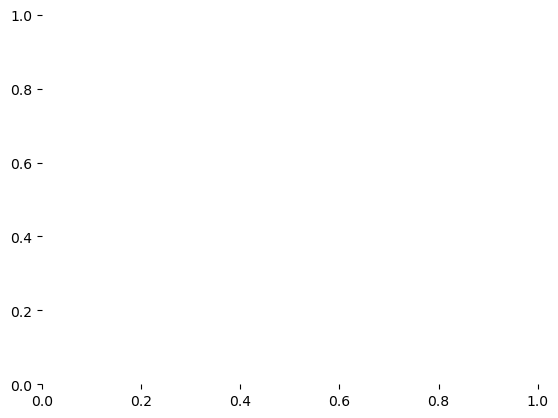

In [81]:
df_17 = filtered_data_2017

corr = df_17.corr()
ax = sns.heatmap(corr, size=corr.abs(), color=corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [80]:
print(corr)

                                                    Geographic Region  \
Geographic Region                                            1.000000   
SEX                                                         -0.003476   
Hispanic Origin                                             -0.127433   
Race                                                         0.102981   
Marital Status                                              -0.019466   
Hypertension                                                 0.014514   
Cholesterol                                                  0.024657   
Coronary Heart Disease                                       0.008879   
emphysema                                                    0.013381   
Asthma                                                      -0.007410   
Cancer                                                       0.010675   
Diabetes                                                     0.011487   
Diabetes Type                                      